# import Libraries & Data #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\Users\Roaya\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("NFLX.csv")

In [3]:
df = data.sort_values('Date')
print(df.shape)
df.head()

(1009, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 63.1+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


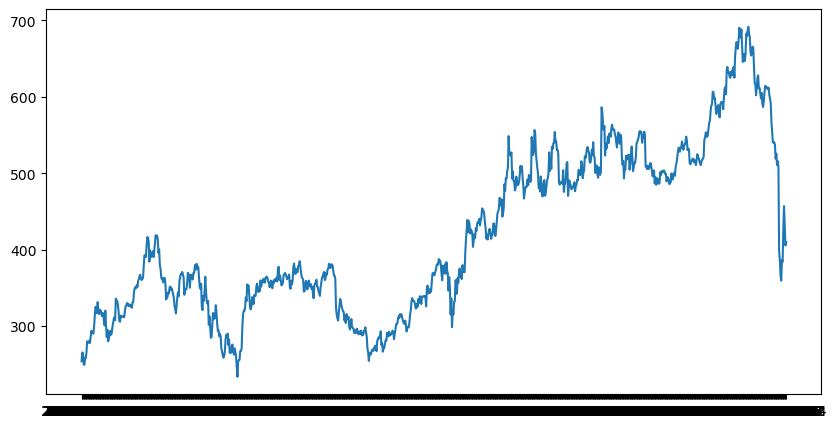

In [6]:
plt.figure(figsize=(10,5))
plt.plot(df["Date"],df["Close"])

In [7]:
close_df = df["Close"]
scaler = MinMaxScaler(feature_range=(0,1))
close_df = scaler.fit_transform(np.array(close_df).reshape(-1,1))
close_df

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

# Training Model #

In [8]:
train_size = int(len(close_df)*0.7)
test_size = len(close_df) - train_size
train_data, test_data = close_df[0:train_size,:],close_df[train_size:len(close_df),:1]

In [9]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test =create_dataset(test_data, time_step)

In [11]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [12]:
model =Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.fit(X_train,y_train, validation_split=0.1, epochs=60, batch_size=64,verbose=1)

Epoch 1/60
9/9 [==============================] - 8s 256ms/step - loss: 0.0289 - val_loss: 0.0043
Epoch 2/60
9/9 [==============================] - 1s 134ms/step - loss: 0.0077 - val_loss: 0.0285
Epoch 3/60
9/9 [==============================] - 1s 133ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 4/60
9/9 [==============================] - 1s 130ms/step - loss: 0.0039 - val_loss: 0.0091
Epoch 5/60
9/9 [==============================] - 1s 133ms/step - loss: 0.0030 - val_loss: 0.0044
Epoch 6/60
9/9 [==============================] - 1s 140ms/step - loss: 0.0026 - val_loss: 0.0047
Epoch 7/60
9/9 [==============================] - 1s 149ms/step - loss: 0.0025 - val_loss: 0.0046
Epoch 8/60
9/9 [==============================] - 1s 151ms/step - loss: 0.0024 - val_loss: 0.0059
Epoch 9/60
9/9 [==============================] - 1s 149ms/step - loss: 0.0023 - val_loss: 0.0045
Epoch 10/60
9/9 [==============================] - 1s 143ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 11/60
9/9 [==

# Predict #

In [15]:
train_predict =model.predict(X_train)
test_predict = model.predict(X_test)

7/7 [==============================] - 0s 28ms/step


In [16]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [17]:
mt.sqrt(mean_squared_error(y_train, train_predict))

373.1144596721916

In [18]:
mt.sqrt(mean_squared_error(y_test, test_predict))

561.3519150341125

# Prediction vs Actual  #

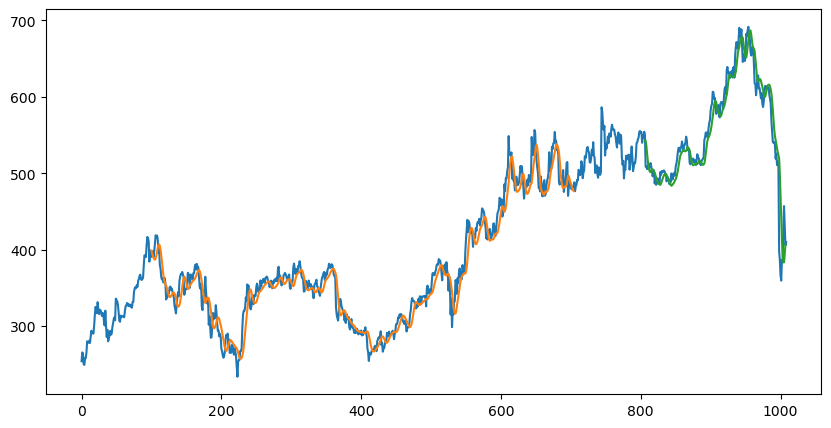

In [19]:
look_back =100
trainPredictPlot = np.empty_like(close_df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(close_df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_df)-1,:]=test_predict

plt.figure(figsize=(10,5))
plt.plot(scaler.inverse_transform(close_df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()